In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading CSV into dataframe
df = pd.read_csv("crypto_data.csv")

In [3]:
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [5]:
# cryptos not being traded
df.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
# display 'Algorithm' column to combine any values
df.Algorithm.value_counts()

Scrypt              424
X11                 197
SHA-256             131
X13                  57
PoS                  44
                   ... 
Stanford Folding      1
VBFT                  1
YescryptR16           1
IMesh                 1
TRC10                 1
Name: Algorithm, Length: 95, dtype: int64

In [7]:
# display 'Algorithm' column to combine any values
df.Algorithm.value_counts().index

Index(['Scrypt', 'X11', 'SHA-256', 'X13', 'PoS', 'CryptoNight', 'Quark',
       'Equihash', 'NeoScrypt', 'NIST5', 'DPoS', 'Ethash', 'SHA-256D',
       'Multiple', 'X15', 'Lyra2REv2', 'Blake', 'XEVAN', 'Lyra2Z', 'Lyra2RE',
       'Skein', 'QuBit', 'CryptoNight-V7', 'PHI1612', 'Scrypt-n', 'SHA-512',
       'Groestl', 'Dagger', 'Keccak', 'X16R', 'Blake2S', 'POS 3.0', 'Blake2b',
       'SkunkHash', 'CryptoNight Heavy', '536', 'Tribus', 'Time Travel',
       'HMQ1725', 'Leased POS', 'C11', 'Argon2', 'BLAKE256', 'SHA3',
       'Curve25519', 'Progressive-n', 'M00N', 'Counterparty', 'Shabal256',
       'Jump Consistent Hash', 'Wild Keccak', 'HybridScryptHash256', 'Zhash',
       'Cryptonight-GPU', 'ECC 256K1', 'CryptoNight Heavy X', 'Rainforest',
       'CryptoNight-lite', 'Exosis', 'Semux BFT consensus', 'QuarkTX',
       'Equihash1927', 'T-Inside', 'SHA3-256', 'Equihash+Scrypt', 'PHI2',
       'Avesta hash', 'Slatechain', 'Momentum', 'X16S', 'Green Protocol',
       'VeChainThor Authority', 

In [8]:
# display 'ProofType' column to combine any values
df.ProofType.value_counts()

PoW                                      535
PoW/PoS                                  468
PoS                                      185
DPoS                                      21
PoS/PoW                                    5
PoA                                        3
PoC                                        3
LPoS                                       2
PoW/PoS                                    2
DPoW                                       1
DPOS                                       1
Limited Confidence Proof-of-Activity       1
HPoW                                       1
Zero-Knowledge Proof                       1
Pos                                        1
PoS/LPoS                                   1
PoW/DPoW                                   1
POS / MN                                   1
POBh                                       1
Proof of Trust                             1
DPoC                                       1
PoW + Hive                                 1
 PoW/PoS  

In [9]:
# display columns with numerical values; 'TotalCoinSupply' needs to be changed to numerical
df.describe()

,TotalCoinsMined
count,7.440000e+02
mean,3.883103e+09
std,3.867263e+10
min,-5.917978e+09
25%,6.322164e+05
50%,1.340427e+07
75%,9.399895e+07
max,9.899887e+11


In [10]:
# remove all cryptocurrencies not being traded
df2 = df.copy()
df2 = df2.loc[df2.IsTrading == True].reset_index(drop=True)

In [11]:
# remove 'IsTrading' column
df2.drop(["IsTrading"], axis=1, inplace=True)

In [12]:
# remove all rows that have at least one null value
df2 = df2.dropna(how="any").reset_index(drop=True)

In [13]:
# keeping mined cryptocurrencies
df2 = df2.loc[df2.TotalCoinsMined > 0].reset_index(drop=True)

In [14]:
# change to numeric for 'TotalCoinSupply'
df2["TotalCoinSupply"] = pd.to_numeric(df2.TotalCoinSupply)

In [15]:
# review 'ProofType' list after column drops
df2.ProofType.value_counts().index

Index(['PoW', 'PoW/PoS', 'PoS', 'DPoS', 'PoC', 'PoS/PoW', 'POBh', 'LPoS',
       'Proof of Trust', 'Pos', 'DPOS', 'Zero-Knowledge Proof', 'HPoW', 'PoA',
       'PoW + Hive', 'PoW/PoS ', 'PoW and PoS', 'Proof of Authority', 'TPoS',
       'PoW/PoW', 'dPoW/PoW', 'PoW/nPoS', 'PoST', 'PoS/PoW/PoT', 'PoS/LPoS'],
      dtype='object')

In [16]:
# changing column values to combine counts
df2.loc[df2.ProofType == "PoW/PoS ", "ProofType"] = "PoW/PoS"
df2.loc[df2.ProofType == "Pos", "ProofType"] = "PoS"
df2.loc[df2.ProofType == "Proof of Authority", "ProofType"] = "PoA"
df2.loc[df2.ProofType == "PoW and PoS", "ProofType"] = "PoW/PoS"
df2.loc[df2.ProofType == "Proof of Trust", "ProofType"] = "PoT"

In [17]:
# removing non-contributing columns
df3 = df2.CoinName
df2.drop(["Unnamed: 0", "CoinName"], axis=1, inplace=True)
df2.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [18]:
# changing 'Algorithm' and 'ProofType' into numerical data
df2 = pd.get_dummies(df2)

In [19]:
df2.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoST,ProofType_PoT,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
# scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df2)

df4 = df2.copy()
df4 = scaler.transform(df2)

# Dimensionality Reduction

In [21]:
# PCA explained variance
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df4)
print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

0.9999999999999999
[2.90833146e-02 2.23548744e-02 2.13977842e-02 2.13230207e-02
 2.13166710e-02 2.13166647e-02 2.13166369e-02 1.95542284e-02
 1.83279505e-02 1.81608659e-02 1.69633877e-02 1.66433175e-02
 1.50498574e-02 1.38065914e-02 1.36502482e-02 1.27425562e-02
 1.25550086e-02 1.15092775e-02 1.11700741e-02 1.09371230e-02
 1.08517996e-02 1.08330616e-02 1.08189995e-02 1.07946667e-02
 1.07803027e-02 1.07341779e-02 1.07198133e-02 1.07188910e-02
 1.07188910e-02 1.07188906e-02 1.07170759e-02 1.07075509e-02
 1.07000385e-02 1.06986826e-02 1.06929510e-02 1.06917995e-02
 1.06868283e-02 1.06853050e-02 1.06786511e-02 1.06784424e-02
 1.06784424e-02 1.06777194e-02 1.06759334e-02 1.06718257e-02
 1.06653262e-02 1.06603064e-02 1.06583323e-02 1.06583323e-02
 1.06583323e-02 1.06583323e-02 1.06583323e-02 1.06583323e-02
 1.06583323e-02 1.06583323e-02 1.06583323e-02 1.06583323e-02
 1.06583323e-02 1.06583323e-02 1.06583323e-02 1.06583323e-02
 1.06583323e-02 1.06583323e-02 1.06583323e-02 1.06583323e-02
 1.06

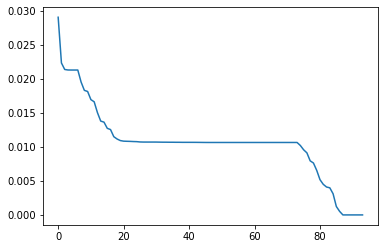

In [22]:
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

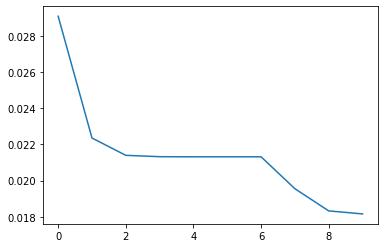

In [23]:
# First 10 PCA components
plt.plot(range(10), pca.explained_variance_ratio_[0:10])
plt.show()

In [24]:
# 72 components are needed to preserve 90% of the explained variance
pca = PCA(n_components=0.90)
pca.fit(df4)
print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)
print(len(pca.explained_variance_ratio_))

0.9049524660902307
[0.02908331 0.02235487 0.02139778 0.02132302 0.02131667 0.02131666
 0.02131664 0.01955423 0.01832795 0.01816087 0.01696339 0.01664332
 0.01504986 0.01380659 0.01365025 0.01274256 0.01255501 0.01150928
 0.01117007 0.01093712 0.0108518  0.01083306 0.010819   0.01079467
 0.0107803  0.01073418 0.01071981 0.01071889 0.01071889 0.01071889
 0.01071708 0.01070755 0.01070004 0.01069868 0.01069295 0.0106918
 0.01068683 0.01068531 0.01067865 0.01067844 0.01067844 0.01067772
 0.01067593 0.01067183 0.01066533 0.01066031 0.01065833 0.01065833
 0.01065833 0.01065833 0.01065833 0.01065833 0.01065833 0.01065833
 0.01065833 0.01065833 0.01065833 0.01065833 0.01065833 0.01065833
 0.01065833 0.01065833 0.01065833 0.01065833 0.01065833 0.01065833
 0.01065833 0.01065833 0.01065833 0.01065833 0.01065833 0.01065833]
72


In [25]:
# Dataframe having 72 PCA components to preserve 90% of the explained variance
df5 = pca.transform(df4)
df5 = pd.DataFrame(df5, columns = ["PCA"+ str(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)])
df5.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA63,PCA64,PCA65,PCA66,PCA67,PCA68,PCA69,PCA70,PCA71,PCA72
0,-0.339038,1.051875,-0.580524,0.040389,-0.001200,-1.043463e-13,-0.002217,-1.325713,-0.020501,-0.327978,...,7.287738e-16,1.084497e-15,1.063239e-15,-1.724682e-15,-1.835928e-15,-4.920077e-15,-1.951635e-15,7.618313e-16,2.519482e-15,5.120813e-15
1,-0.322352,1.052052,-0.581071,0.040039,-0.001183,-1.051234e-13,-0.002173,-1.328456,-0.025559,-0.325026,...,7.287738e-16,1.087967e-15,1.063239e-15,-1.724682e-15,-1.832459e-15,-4.920077e-15,-1.951635e-15,7.618313e-16,2.516013e-15,5.120813e-15
2,2.302946,1.666803,-0.671495,0.014128,-0.002897,-6.614076e-13,-0.001604,-1.522838,-0.971939,0.316133,...,-1.005947e-14,1.113809e-14,-4.266220e-14,-9.394085e-14,2.321261e-14,8.207110e-14,5.730999e-14,-4.277973e-14,1.053390e-14,-1.665430e-14
3,-0.142954,-1.332275,0.177176,-0.012814,0.000945,1.122604e-13,0.001348,0.274322,0.252155,-0.065149,...,1.132097e-15,8.835242e-15,-1.822624e-14,-2.501838e-15,1.842131e-14,4.523612e-16,9.764688e-15,-3.252319e-15,-4.301451e-15,-2.152883e-15
4,-0.148958,-2.048969,0.373966,-0.008522,0.000961,2.466772e-13,0.000370,0.504667,0.177515,0.080956,...,3.312387e-14,-9.826913e-15,-8.220351e-15,1.644063e-13,1.173214e-13,2.255968e-14,7.485845e-14,-7.672133e-14,1.616482e-14,4.682183e-14


In [26]:
# Creating TSNE model
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df5)
tsne_features.shape

(532, 2)

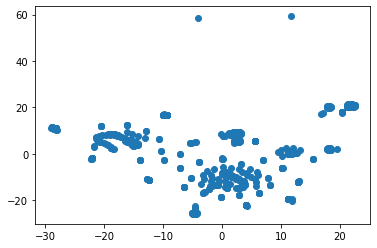

In [27]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [28]:
# KMeans
from sklearn.cluster import KMeans

C:\Users\bethz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


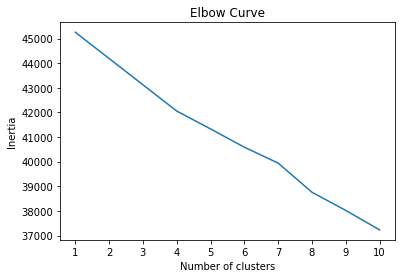

In [29]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df5)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(1, 11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
# Predicting clusters with k=10

# Initialize the k-means model
model = KMeans(n_clusters=10, random_state=0)

# Fit the model
model.fit(df5)

# Predict clusters
predictions = model.predict(df5)

# Add the predicted class column to the dataframe
df5["class"] = model.labels_
df5.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA64,PCA65,PCA66,PCA67,PCA68,PCA69,PCA70,PCA71,PCA72,class
0,-0.339038,1.051875,-0.580524,0.040389,-0.001200,-1.043463e-13,-0.002217,-1.325713,-0.020501,-0.327978,...,1.084497e-15,1.063239e-15,-1.724682e-15,-1.835928e-15,-4.920077e-15,-1.951635e-15,7.618313e-16,2.519482e-15,5.120813e-15,2
1,-0.322352,1.052052,-0.581071,0.040039,-0.001183,-1.051234e-13,-0.002173,-1.328456,-0.025559,-0.325026,...,1.087967e-15,1.063239e-15,-1.724682e-15,-1.832459e-15,-4.920077e-15,-1.951635e-15,7.618313e-16,2.516013e-15,5.120813e-15,2
2,2.302946,1.666803,-0.671495,0.014128,-0.002897,-6.614076e-13,-0.001604,-1.522838,-0.971939,0.316133,...,1.113809e-14,-4.266220e-14,-9.394085e-14,2.321261e-14,8.207110e-14,5.730999e-14,-4.277973e-14,1.053390e-14,-1.665430e-14,2
3,-0.142954,-1.332275,0.177176,-0.012814,0.000945,1.122604e-13,0.001348,0.274322,0.252155,-0.065149,...,8.835242e-15,-1.822624e-14,-2.501838e-15,1.842131e-14,4.523612e-16,9.764688e-15,-3.252319e-15,-4.301451e-15,-2.152883e-15,2
4,-0.148958,-2.048969,0.373966,-0.008522,0.000961,2.466772e-13,0.000370,0.504667,0.177515,0.080956,...,-9.826913e-15,-8.220351e-15,1.644063e-13,1.173214e-13,2.255968e-14,7.485845e-14,-7.672133e-14,1.616482e-14,4.682183e-14,8


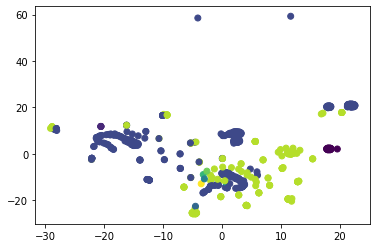

In [31]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=df5["class"])
plt.show()

In [32]:
# class sets; more distinct counts at k=10
df5["class"].value_counts()

2    331
8    174
0     17
1      4
9      1
6      1
5      1
4      1
7      1
3      1
Name: class, dtype: int64

In [33]:
# Analysis
df_merged = df2.merge(df5, how='outer', left_index=True, right_index=True)

In [34]:
df6 = df_merged[['TotalCoinsMined', 'TotalCoinSupply', 'class']]
df_final = df6.merge(df3, how='outer', left_index=True, right_index=True)
df_final.head()

,TotalCoinsMined,TotalCoinSupply,class,CoinName
0,4.199995e+01,4.200000e+01,2,42 Coin
1,1.055185e+09,5.320000e+08,2,404Coin
2,2.927942e+10,3.141593e+11,2,EliteCoin
3,1.792718e+07,2.100000e+07,2,Bitcoin
4,1.076842e+08,0.000000e+00,8,Ethereum


In [35]:
class_coin = df_final.loc[df_final['CoinName'] == 'Bitcoin', 'class'].item()
class_coin

2

In [36]:
# Conclusion
df_final.loc[df_final['class'] == class_coin]

,TotalCoinsMined,TotalCoinSupply,class,CoinName
0,4.199995e+01,4.200000e+01,2,42 Coin
1,1.055185e+09,5.320000e+08,2,404Coin
2,2.927942e+10,3.141593e+11,2,EliteCoin
3,1.792718e+07,2.100000e+07,2,Bitcoin
5,6.303924e+07,8.400000e+07,2,Litecoin
...,...,...,...,...
511,7.467606e+07,1.050000e+08,2,OKCash
514,2.520056e+08,3.000000e+08,2,WhiteCoin
515,1.120385e+06,6.016814e+07,2,FriendshipCoin
517,1.407778e+05,1.200000e+05,2,Triangles Coin


Bitcoin is still on a positive trend along with Ethereum. Also, these were clustered together into the same class which suggests other cryptocurriences in this class might have similar performance. However, these results should not dismiss the other classes, but the initial focus should in cryptos having the same class with Bitcoin and Ethereum. 